<a href="https://colab.research.google.com/github/eclipse2ant/Hello-World/blob/master/%E4%BF%9D%E5%AD%98%E7%89%88%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85%E7%94%9F%E5%AD%98%E4%BA%88%E6%B8%AC%E3%83%8E%E3%83%BC%E3%83%88_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 必要なライブラリのインポート

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Google Driveをマウントしてデータを読み込む

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# データの読み込み

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/Data/train_new.csv')
test_data = pd.read_csv('/content/drive/My Drive/Data/test_new.csv')

# 前処理: 'Age'の欠損値を中央値で埋める

In [ ]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# カテゴリカルデータを数値に変換

In [ ]:
encoder = LabelEncoder()
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = encoder.transform(test_data['Sex'])

# 特徴量とターゲットに分ける

In [ ]:
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train_data['Survived']

# 訓練とテストの分割

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# モデリング: ランダムフォレストクラシファイア

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 予測

In [ ]:
y_pred = model.predict(X_val)


# 評価

In [ ]:
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred))


# 最終予測をテストデータフレームに追加

```
# これはコードとして書式設定されます
```



In [ ]:
final_predictions = model.predict(test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
test_data['PredictedSurvival'] = final_predictions



# グラフ化

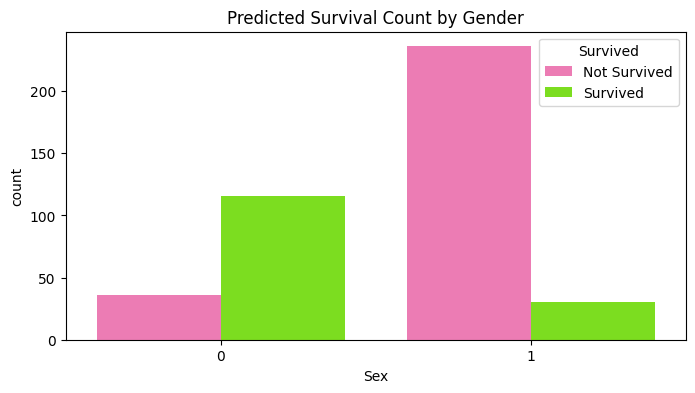

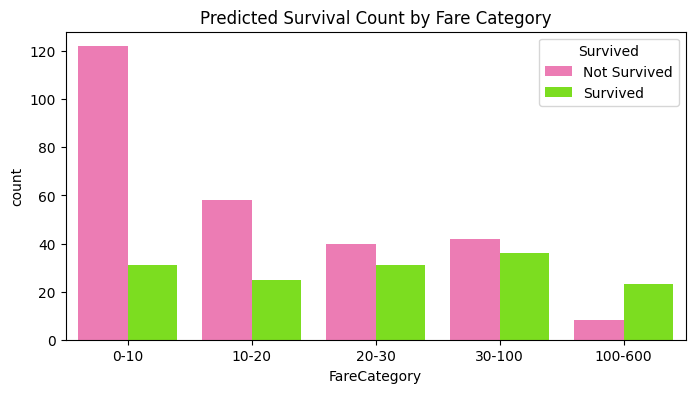

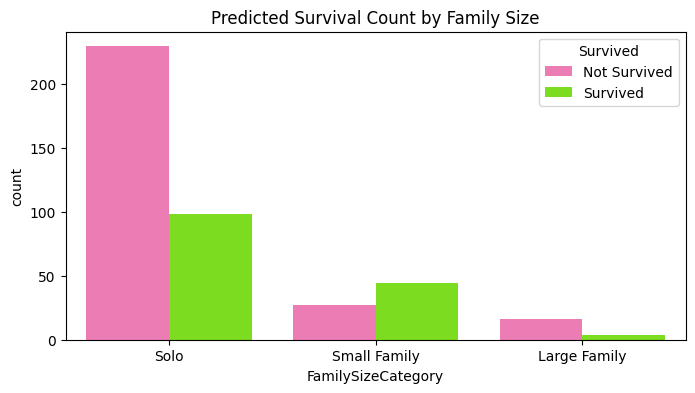

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## カスタムカラーパレット
survived_palette = ['#FF69B4', '#7CFC00']  # 'Not Survived'、'Survived'

## 性別による予測生存数のグラフ
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='PredictedSurvival', data=test_data, palette=survived_palette)
plt.title('Predicted Survival Count by Gender')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

## 運賃の分布（運賃をビニングしてカテゴリにする）
fare_bins = [0, 10, 20, 30, 100, 600]
fare_labels = ['0-10', '10-20', '20-30', '30-100', '100-600']
test_data['FareCategory'] = pd.cut(test_data['Fare'], bins=fare_bins, labels=fare_labels)
plt.figure(figsize=(8, 4))
sns.countplot(x='FareCategory', hue='PredictedSurvival', data=test_data, palette=survived_palette)
plt.title('Predicted Survival Count by Fare Category')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


## 家族のサイズによる生存者数
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
family_size_bins = [0, 1, 3, 10]
family_size_labels = ['Solo', 'Small Family', 'Large Family']
test_data['FamilySizeCategory'] = pd.cut(test_data['FamilySize'], bins=family_size_bins, labels=family_size_labels, include_lowest=True)

plt.figure(figsize=(8, 4))
sns.countplot(x='FamilySizeCategory', hue='PredictedSurvival', data=test_data, palette=survived_palette)
plt.title('Predicted Survival Count by Family Size')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [ ]:
encoder = LabelEncoder()
train_data['Sex_encoded'] = encoder.fit_transform(train_data['Sex'])
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(mapping)

{0: 0, 1: 1}
